In [1]:
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
cetaceans <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-12-18/allCetaceanData.csv")  %>% 
                    janitor::clean_names() %>% 
                    select(-x1) %>% 
                    mutate(birth_year = as.integer(birth_year), 
                           age = ifelse(status == "Died", 
                                        year(status_date) - birth_year, NA), 
                           species = str_replace(species, "Beluga Whale", "Beluga"))

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  originDate = col_date(format = ""),
  statusDate = col_date(format = ""),
  transferDate = col_date(format = ""),
  entryDate = col_date(format = "")
)

See spec(...) for full column specifications.

Warning message:
“NAs introduced by coercion”


In [3]:
# two types of NA
cetaceans %>% 
    count(age) %>% 
    filter(is.na(age))

age,n
<dbl>,<int>
NA,604
NA,636


In [4]:
names(cetaceans)
#head(cetaceans)

[1] "species"         "id"              "name"            "sex"            
 [5] "accuracy"        "birth_year"      "acquisition"     "origin_date"    
 [9] "origin_location" "mother"          "father"          "transfers"      
[13] "currently"       "region"          "status"          "status_date"    
[17] "cod"             "notes"           "transfer_date"   "transfer"       
[21] "entry_date"      "age"

In [5]:
cetaceans %>% 
    count(acquisition, sort = TRUE)

acquisition,n
<chr>,<int>
Capture,1214
Born,776
Unknown,95
Rescue,89
Stillbirth,15
Miscarriage,5


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



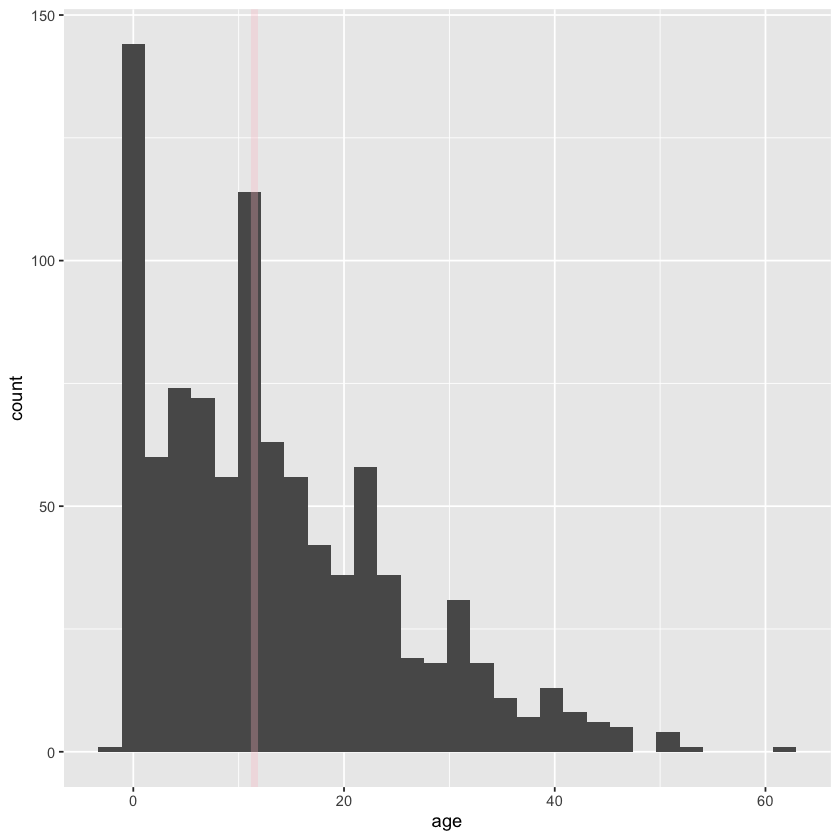

In [6]:
cetaceans %>% 
    filter(status == "Died", 
           !is.na(birth_year), !is.na(status_date)) %>% 
    ggplot(aes(age)) + 
        geom_histogram() +
        geom_vline(aes(xintercept = median(age)), 
                   color = "pink", size = 2, alpha = 0.3)

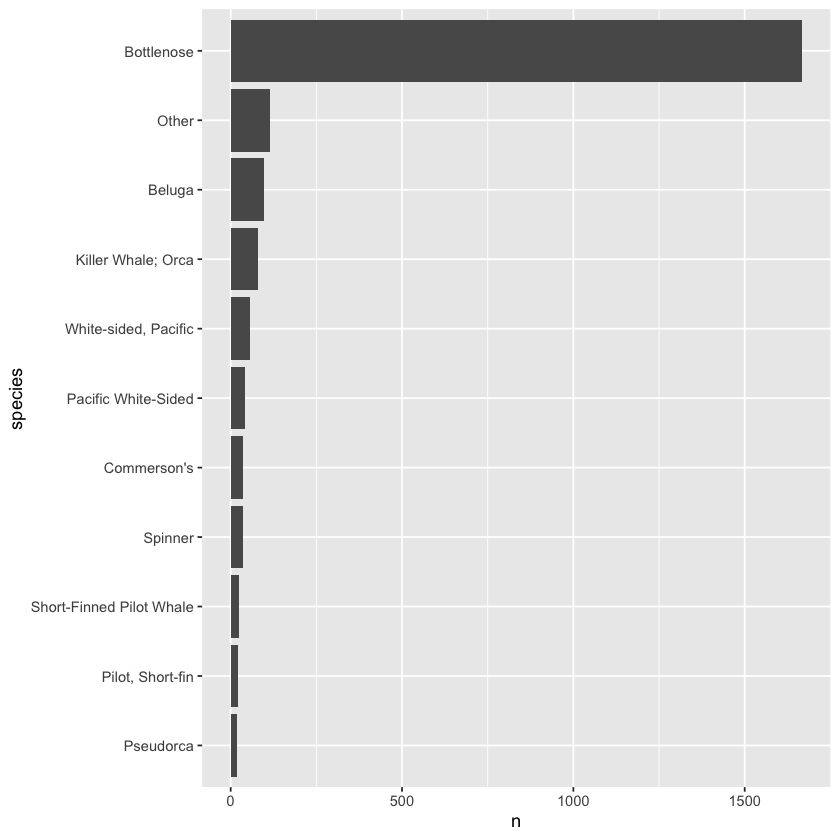

In [7]:
cetaceans %>% 
    count(species = fct_lump(species, 10)) %>% 
    mutate(species = fct_reorder(species, n)) %>% 
    ggplot(aes(n, species)) + 
        geom_col()

Warning message:
“Removed 46 rows containing non-finite values (stat_boxplot).”


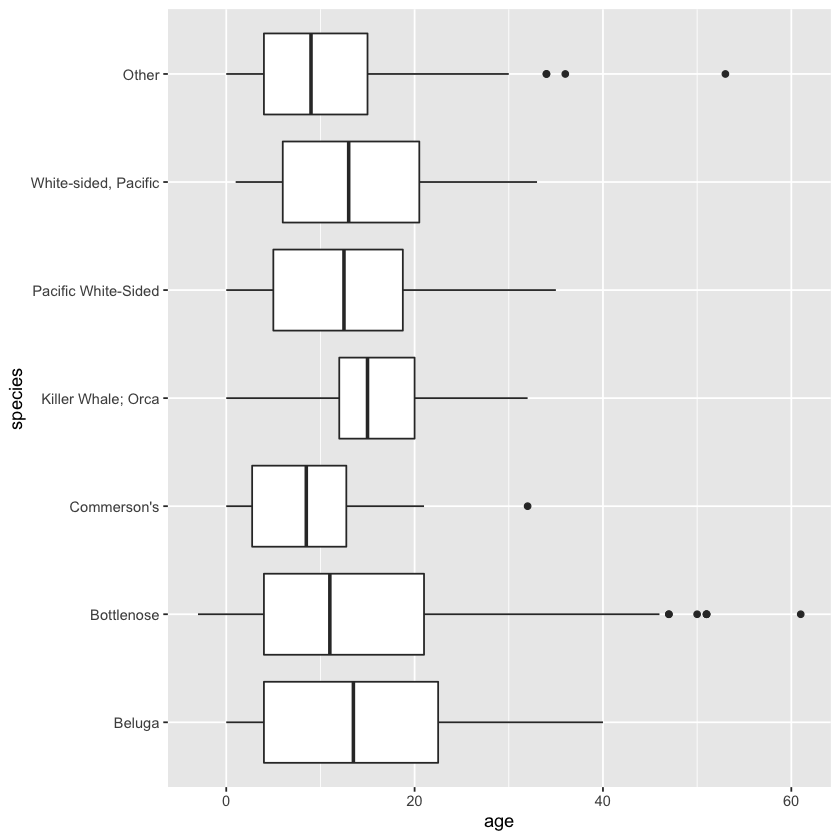

In [8]:
cetaceans %>% 
    filter(!is.na(birth_year), !is.na(status_date)) %>% 
    select(age, species, birth_year, status_date) %>% 
    mutate(species = fct_lump(species, 5),
           m_age = mean(age),
           species = fct_reorder(species, m_age)) %>% 
    ggplot(aes(age, species)) + 
        geom_boxplot()

In [9]:
cetaceans %>%
    count(acquisition, origin_location, sort = TRUE) %>% 
    filter(origin_location != "Unknown")

acquisition,origin_location,n
<chr>,<chr>,<int>
Capture,"Gulf of Mexico, MS, US",116
Capture,"Pacific Ocean, CA, US",85
Born,SeaWorld San Diego,81
Born,SeaWorld Orlando,78
Born,SeaWorld San Antonio,72
Born,U.S. Navy,63
Capture,Florida Keys,56
Born,Dolphin Research Center,45
Born,Discovery Cove,37


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 69 rows containing non-finite values (stat_bin).”


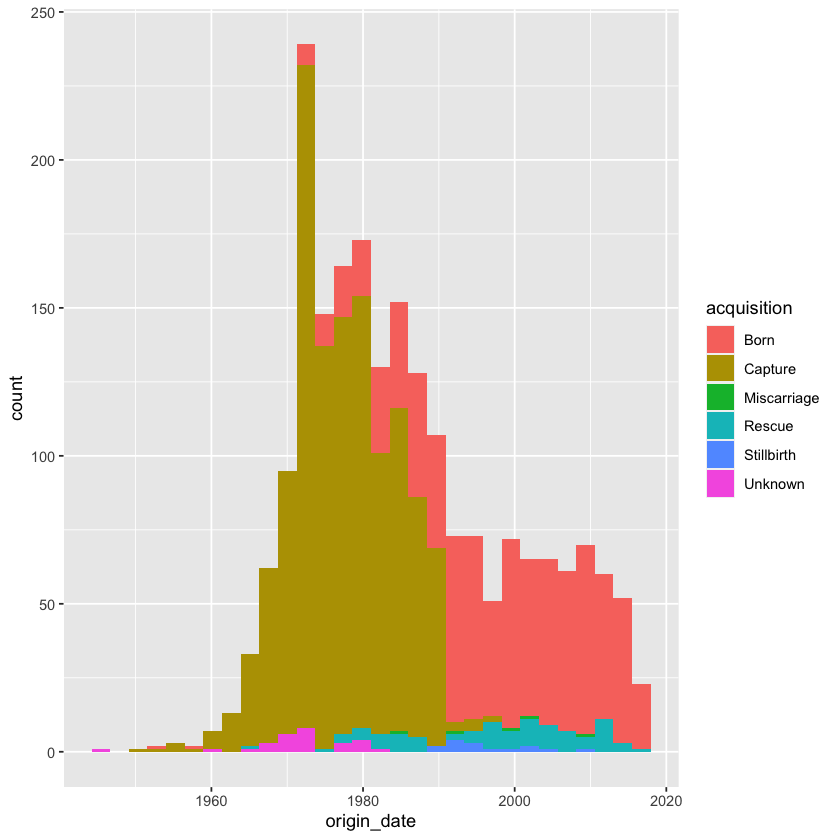

In [10]:
cetaceans %>% 
    ggplot(aes(origin_date, fill = acquisition)) + 
        geom_histogram()

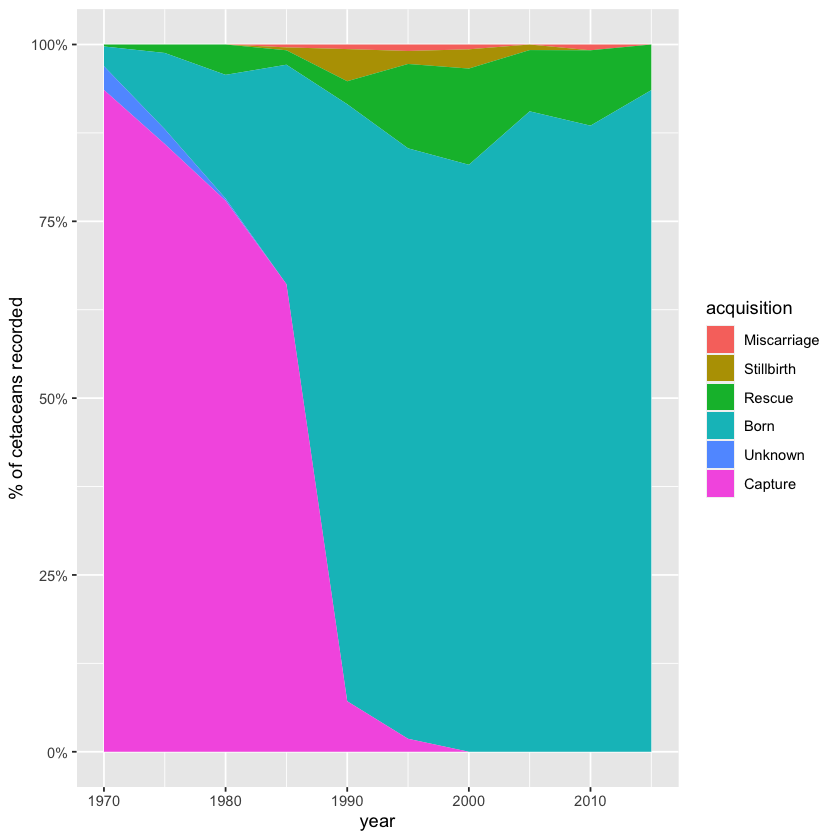

In [11]:
cetaceans %>% 
    filter(year(origin_date) >= 1970) %>% 
    count(decade = 5 *(year(origin_date) %/% 5), 
          acquisition) %>% 
    complete(acquisition, decade, fill = list(n = 0)) %>% 
    group_by(decade) %>% 
    mutate(percent = n / sum(n), 
           acquisition = fct_reorder(acquisition, percent)) %>% 
    ggplot(aes(decade, percent, fill = acquisition)) +
        geom_area() +
        scale_y_continuous(labels = scales::percent_format()) +
        labs(y = "% of cetaceans recorded", x = "year")

In [12]:
library(fuzzyjoin)

regexes <- tribble(
    ~regex, ~category,
    "Unknown", "Unknown", 
    "Florida|FL", "Florida",
    "Texas|TX", "Texas",
    "SeaWorld", "SeaWorld", 
    "Pacific", "Pacific Ocean",
    "Atlantic", "Atlantic Ocean"
)

regexes

regex,category
<chr>,<chr>
Unknown,Unknown
Florida|FL,Florida
Texas|TX,Texas
SeaWorld,SeaWorld
Pacific,Pacific Ocean
Atlantic,Atlantic Ocean


In [13]:
cetaceans_annotated <- cetaceans %>% 
    mutate(unique_id = row_number()) %>% 
    regex_left_join(regexes, c(origin_location = "regex")) %>% 
    distinct(unique_id, .keep_all = TRUE) %>% 
    mutate(category = coalesce(category, origin_location))

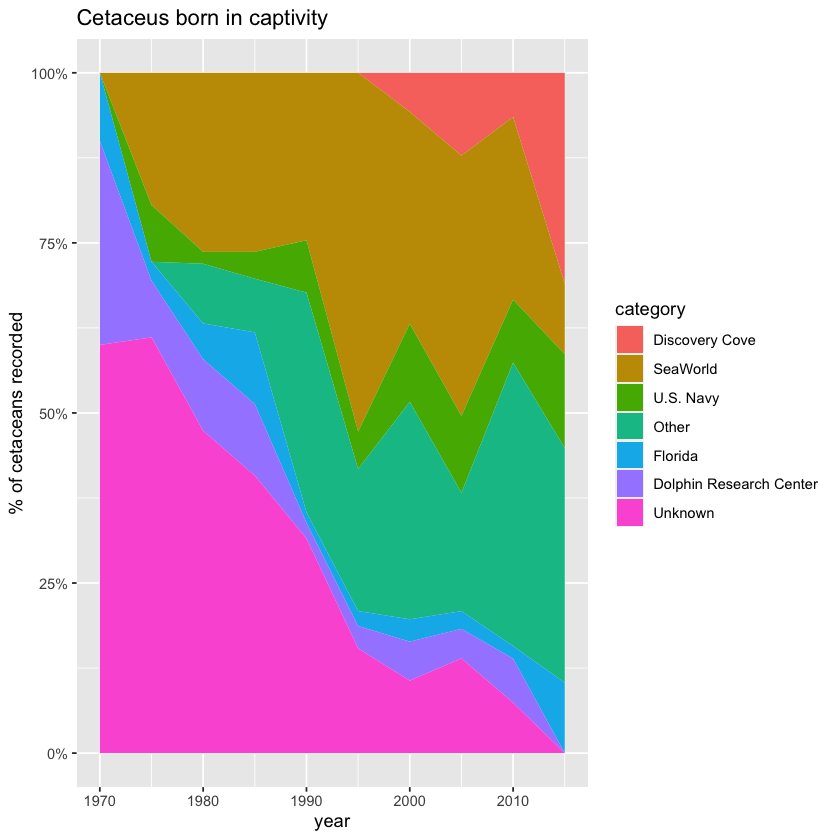

In [26]:
cetaceans_annotated %>%  
    filter(acquisition == "Born", 
           year(origin_date) >= 1970) %>%
    mutate(category = fct_lump(category, 6)) %>% 
    count(decade = 5 *(year(origin_date) %/% 5), 
          category) %>% 
    complete(category, decade, fill = list(n = 0)) %>% 
    group_by(decade) %>% 
    mutate(percent = n / sum(n), 
           category = fct_reorder(category, percent)) %>% 
    ggplot(aes(decade, percent, fill = category)) +
        geom_area() +
        scale_y_continuous(labels = scales::percent_format()) +
        labs(title = "Cetaceus born in captivity",
             y = "% of cetaceans recorded", 
             x = "year")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


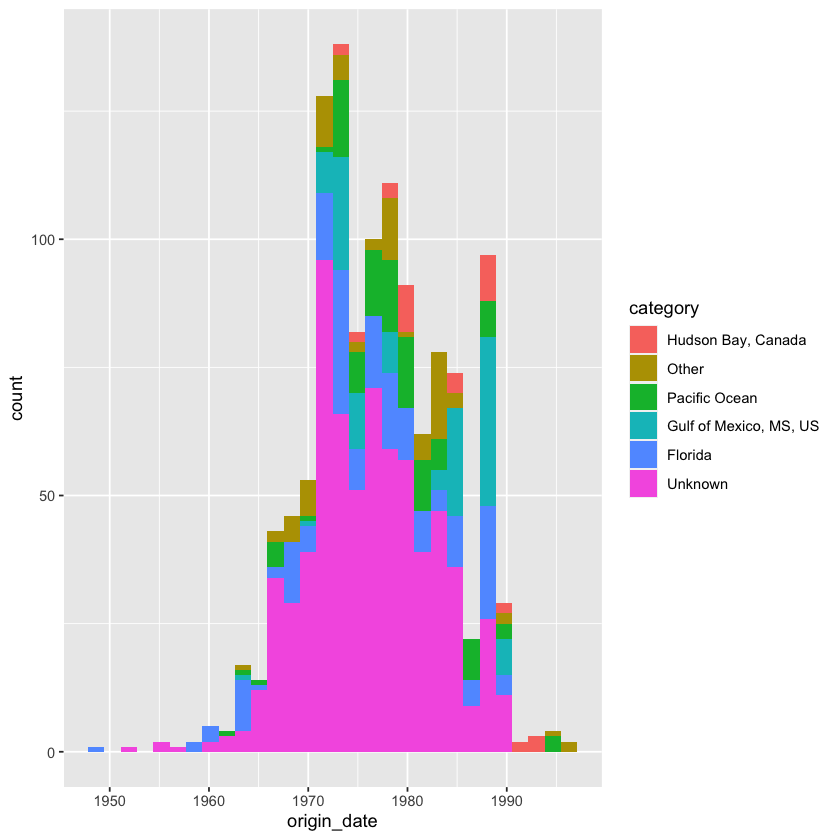

In [31]:
cetaceans_annotated %>%  
    filter(acquisition == "Capture") %>%
    mutate(category = fct_lump(category, 5), 
           category = fct_reorder(category, category, length)) %>% 
    ggplot(aes(origin_date, fill = category)) +
        geom_histogram()

# Survival Analysis 

In [32]:
library(survival)

In [57]:
cetaceans_survival <- cetaceans %>% 
    filter(status %in% c("Alive", "Died")) %>% 
    mutate(death_year = ifelse(status == "Alive", 2017, year(status_date)), 
           status = ifelse(status == "Alive", 0, 1)) %>% 
    filter(!is.na(death_year)) %>% 
    select(age, death_year, birth_year, status, sex, acquisition, species) %>% 
    filter(death_year > birth_year)

head(cetaceans_survival)

age,death_year,birth_year,status,sex,acquisition,species
<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
NA,2017,1989,0,F,Born,Bottlenose
NA,2017,1973,0,F,Born,Bottlenose
NA,2017,1978,0,M,Born,Bottlenose
NA,2017,1979,0,F,Born,Bottlenose
NA,2017,1979,0,M,Born,Bottlenose
NA,2017,1980,0,F,Born,Bottlenose


In [59]:
survfit(Surv(birth_year, death_year, status, type = "interval") ~ 1, cetaceans_survival)

Call: survfit(formula = Surv(birth_year, death_year, status, type = "interval") ~ 
    1, data = cetaceans_survival)

records       n  events  median 0.95LCL 0.95UCL 
   1295    1296     833    1985    1983    1986 